## 1 导入常用库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2 读入相关文件

In [2]:
path = '../ml-100k/'

names = ['user_id', 'item_id', 'rating', 'timestamp']
df_data = pd.read_csv(path+'u.data', sep='\t', names=names)
df_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
names = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL',\
                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',\
                'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_item = pd.read_csv(path+'u.item', sep='|', names=names, engine='python')
df_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 3 构造 user-item matrix

In [6]:
n_users = df_data.user_id.nunique()
n_items = df_data.item_id.nunique()

ratings = np.zeros((n_users, n_items))
for row in df_data.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
print('ratings :\n',ratings)
print("ratings shape : ", ratings.shape)

ratings :
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
ratings shape :  (943, 1682)


In [8]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(ratings)
H = model.components_

In [11]:
print('W shape :', W.shape)
print('H shape :', H.shape)

W shape : (943, 2)
H shape : (2, 1682)


In [9]:
nmf_ratings = np.dot(W, H)
nmf_ratings

array([[3.71104182e+00, 1.48479447e+00, 7.39555579e-01, ...,
        3.64527386e-03, 1.45530187e-02, 1.44128259e-02],
       [2.11741605e+00, 2.36707922e-01, 5.51608022e-01, ...,
        4.76741752e-03, 2.41569295e-05, 0.00000000e+00],
       [9.85444703e-01, 1.10163786e-01, 2.56718183e-01, ...,
        2.21875447e-03, 1.12426267e-05, 0.00000000e+00],
       ...,
       [1.04461678e+00, 1.16778687e-01, 2.72133099e-01, ...,
        2.35198194e-03, 1.19177021e-05, 0.00000000e+00],
       [1.45793105e+00, 5.42098205e-01, 2.99297939e-01, ...,
        1.61357007e-03, 5.15827229e-03, 5.10696591e-03],
       [2.44657514e+00, 9.41437674e-01, 4.95517075e-01, ...,
        2.56804698e-03, 9.08656638e-03, 8.99756599e-03]])

In [10]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [13]:
# 计算两者之间的 MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(nmf_ratings, ratings)

0.5711591772894231

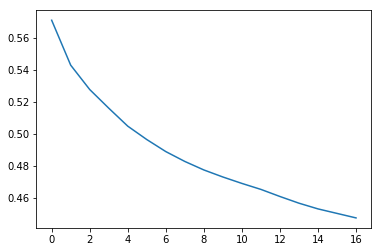

In [14]:
#设置不同的主成分进行对比
mse = []
for n in range(2,19):
    model = NMF(n_components=n, init='random', random_state=0)
    W = model.fit_transform(ratings)
    H = model.components_
    m = mean_squared_error(np.dot(W, H), ratings)
    mse.append(m)
plt.plot(mse)

训练误差随着主成分的增大而减小，可见减小主成分是以牺牲准确率为代价的

## 4 继续探索

参考下面的文章，进行学习

[矩阵分解在推荐系统中的应用：NMF和经典SVD实战](https://www.letiantian.me/2015-05-25-nmf-svd-recommend/)

In [17]:
# 用户和物品的主题分布
RATE_MATRIX = np.array(
    [[5, 5, 3, 0, 5, 5],
     [5, 0, 4, 0, 4, 4],
     [0, 3, 0, 5, 4, 5],
     [5, 4, 3, 3, 5, 5]]
)

nmf = NMF(n_components=2)  # 设有2个隐主题
user_distribution = nmf.fit_transform(RATE_MATRIX)
item_distribution = nmf.components_

print('用户的主题分布：')
print(user_distribution)
print('物品的主题分布：')
print(item_distribution)

用户的主题分布：
[[2.34494987 0.82150409]
 [2.21110154 0.        ]
 [0.         3.10477325]
 [1.96398011 1.56981774]]
物品的主题分布：
[[2.27282624 0.96551201 1.52834188 0.         1.69637147 1.5972674 ]
 [0.04467856 1.16320667 0.         1.58334882 1.24250726 1.52432003]]


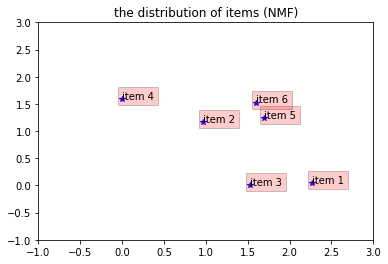

In [18]:
# 可视化物品的主题分布：
item_distribution = item_distribution.T
plt.plot(item_distribution[:, 0], item_distribution[:, 1], "b*")
plt.xlim((-1, 3))
plt.ylim((-1, 3))

plt.title(u'the distribution of items (NMF)')
count = 1
for item in item_distribution:
    plt.text(item[0], item[1], 'item '+str(count), bbox=dict(facecolor='red', alpha=0.2),)
    count += 1

plt.show()

从距离的角度来看，item 5和item 6比较类似；从余弦相似度角度看，item 2、5、6 比较相似，item 1、3比较相似

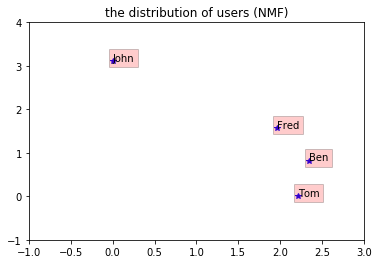

In [19]:
# 可视化用户的主题分布：
users = ['Ben', 'Tom', 'John', 'Fred']
zip_data = zip(users, user_distribution)

plt.title(u'the distribution of users (NMF)')
plt.xlim((-1, 3))
plt.ylim((-1, 4))
for item in zip_data:
    user_name = item[0]
    data = item[1]
    plt.plot(data[0], data[1], "b*")
    plt.text(data[0], data[1], user_name, bbox=dict(facecolor='red', alpha=0.2),)

plt.show()

从距离的角度来看，Fred、Ben、Tom的口味差不多；从余弦相似度角度看，Fred、Ben、Tom的口味还是差不多。

### 如何推荐

现在对于用户A，如何向其推荐物品呢？

- 方法1： 找出与用户A最相似的用户B，将B评分过的、评分较高、A没评分过的的若干物品推荐给A。
- 方法2： 找出用户A评分较高的若干物品，找出与这些物品相似的、且A没评分的若干物品推荐给A。
- 方法3： 找出用户A最感兴趣的k个主题，找出最符合这k个主题的、且A没评分的若干物品推荐给A。
- 方法4： 由NMF得到的两个矩阵，重建评分矩阵。